In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [113]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 18
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [145]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temp_cuts.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_temp_cuts.csv')
stars = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/stellar_propoerties.csv')

In [6]:
len(stars['type'].values)

41

### Spectral Type of all of the targets

In [138]:
stars['type'].values

array(['K4V', 'M2V', 'G5', 'M2V', 'K7V', 'M0V', 'M1V', 'K6V', 'G8V',
       'G8V', 'G8V', 'F7V', 'K0V', 'K2V', 'K3V', 'K3V', 'G7V', 'G8V',
       'G5V', 'K5V', 'K0V', 'F9V', 'K6V', 'K0V', 'K0V', 'G5', 'G0V',
       'K4V', 'K3V', 'K3V', 'K3V', 'K2V', 'F8V', 'K3V', 'G8V', 'K4V',
       'G9V', 'M8.9V', 'M8.9V', 'M4V', 'K3V'], dtype=object)

In [146]:
F = stars[stars['type'].str.contains('F')]
G = stars[stars['type'].str.contains('G')]
K = stars[stars['type'].str.contains('K')]
M = stars[stars['type'].str.contains('M')]
print(F)

       hostname  st_mass  st_radius  st_teff  st_log_lum  st_distance type  \
11  KIC 6067545    1.045      1.040   6202.0    0.160000   519.100000  F7V   
21  KIC 8352009    1.221      1.276   6065.7    0.299000  1019.500000  F9V   
32  KIC 3548622    1.025      0.947   6117.0    0.053549  2158.144469  F8V   

      Jmag    Kmag  activity_index     Status Discovery  
11  12.022  11.723             NaN  Candidate    Kepler  
21  13.112  12.752             NaN  Candidate    Kepler  
32  13.454  12.964             NaN  Candidate    Kepler  


In [147]:
spectral_types = [F['type'].values,G['type'].values,K['type'].values,M['type'].values]
print(spectral_types)

[array(['F7V', 'F9V', 'F8V'], dtype=object), array(['G5V', 'G8V', 'G8V', 'G8V', 'G7V', 'G8V', 'G5V', 'G5V', 'G0V',
       'G8V', 'G9V'], dtype=object), array(['K4V', 'K7V', 'K6V', 'K0V', 'K2V', 'K3V', 'K3V', 'K5V', 'K0V',
       'K6V', 'K0V', 'K0V', 'K4V', 'K3V', 'K3V', 'K3V', 'K2V', 'K3V',
       'K4V', 'K3V'], dtype=object), array(['M2V', 'M2V', 'M0V', 'M1V', 'M8.9V', 'M8.9V', 'M4V'], dtype=object)]


In [148]:
np.sort(spectral_types[1])

array(['G0V', 'G5V', 'G5V', 'G5V', 'G7V', 'G8V', 'G8V', 'G8V', 'G8V',
       'G8V', 'G9V'], dtype=object)

In [149]:
len(M)

7

Text(0.5, 0, 'Spectral Type')

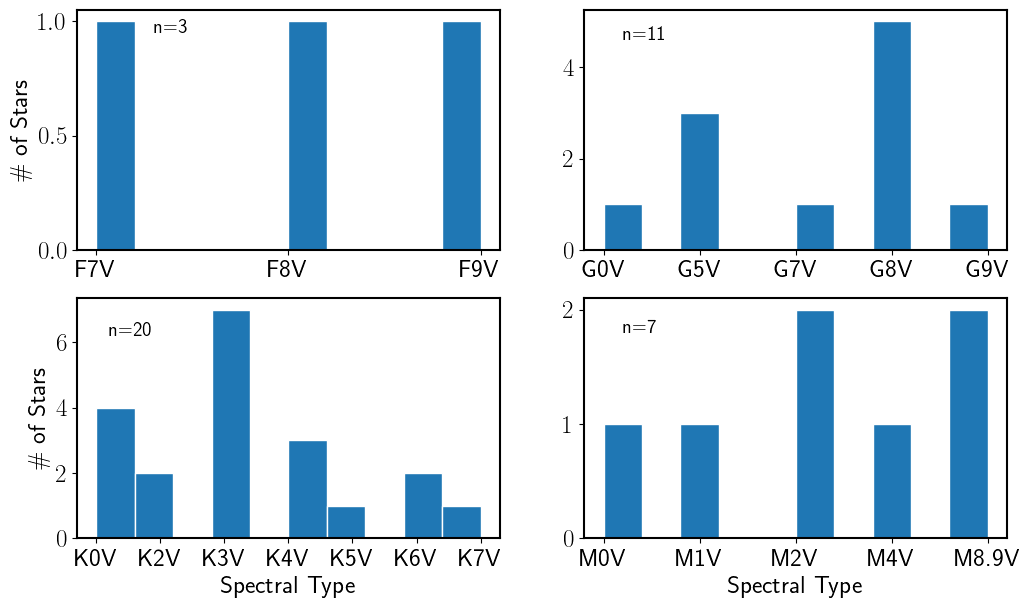

In [153]:
fig, axs = plt.subplots(2,2, figsize=(12,7), facecolor='w', edgecolor='k')

axs[0,0].hist(np.sort(spectral_types[0]),edgecolor='white')
axs[0,0].text(.3,.95,'n=3',fontsize=14)
#axs[0,0].set_xlabel('Spectral Type')
axs[0,0].set_ylabel('\# of Stars')

axs[0,1].hist(np.sort(spectral_types[1]),edgecolor='white')
axs[0,1].text(.2,4.6,'n=11',fontsize=14)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#axs[0,1].set_xlabel('Spectral Type')
#axs[0,1].set_ylabel('\# of Stars')

axs[1,0].hist(np.sort(spectral_types[2]),edgecolor='white')
axs[1,0].text(.2,6.2,'n=20',fontsize=14)
axs[1,0].set_xlabel('Spectral Type')
axs[1,0].set_ylabel('\# of Stars')

axs[1,1].hist(np.sort(spectral_types[3]),edgecolor='white')
axs[1,1].text(.2,1.8,'n=7',fontsize=14)
axs[1,1].set_xlabel('Spectral Type')
#axs[1,1].set_ylabel('\# of Stars')

### Plotting the J and K magnitude of the targets

Text(0.5, 1.0, 'n=41')

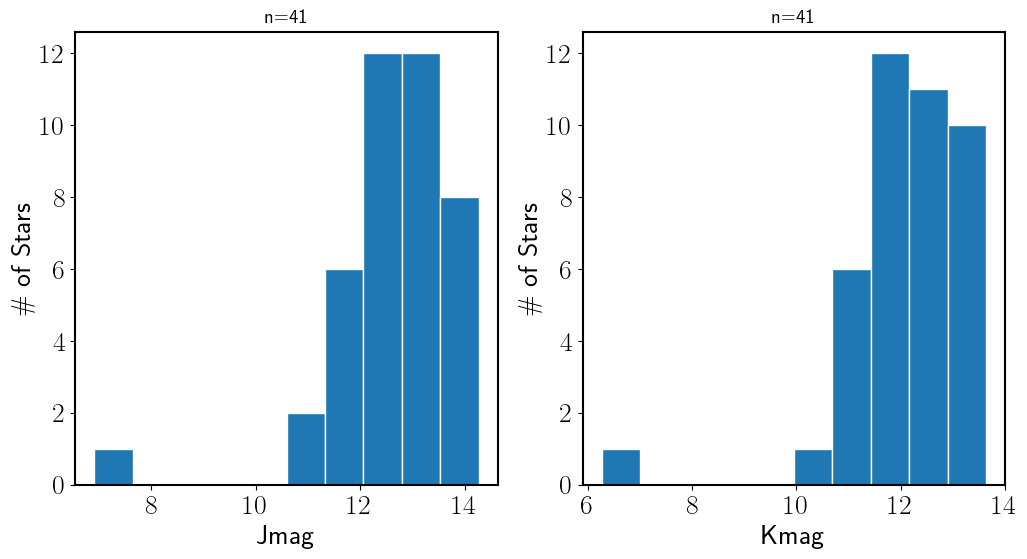

In [95]:
fig, axs = plt.subplots(1,2, figsize=(12,6), facecolor='w', edgecolor='k')

axs[0].hist(stars['Jmag'].values,edgecolor='white')
axs[0].set_xlabel('Jmag')
axs[0].set_ylabel('\# of Stars')
axs[0].set_title('n=41',fontsize=14)

axs[1].hist(stars['Kmag'].values,edgecolor='white')
axs[1].set_xlabel('Kmag')
axs[1].set_ylabel('\# of Stars')
axs[1].set_title('n=41',fontsize=14)

### Plotting the luminosity versus distance of the targets

In [13]:
10**stars['st_log_lum'].values

array([2.25423921e-01, 2.69773943e-02, 2.66072506e-01, 2.30144182e-02,
       7.55092228e-02, 6.28058359e-02, 6.38263486e-02, 1.30918192e-01,
       5.78096047e-01, 6.91830971e-01, 5.61047976e-01, 1.44543977e+00,
       3.79591868e-01, 3.79314985e-01, 2.85101827e-01, 2.81190083e-01,
       6.44169266e-01, 6.36795521e-01, 4.08319386e-01, 1.48251809e-01,
       4.40554864e-01, 1.99067334e+00, 1.30316678e-01, 5.03500609e-01,
       4.13047502e-01, 7.12853030e-01, 1.18850223e+00, 1.16775870e-01,
       4.02938106e-01, 1.35207256e-01, 3.34195040e-01, 3.82824743e-01,
       1.13122395e+00, 2.03235701e-01, 3.96278034e-01, 2.48885732e-01,
       7.97994687e-01, 1.43852034e-03, 1.43852034e-03, 4.90923366e-03,
       2.42482000e-01])

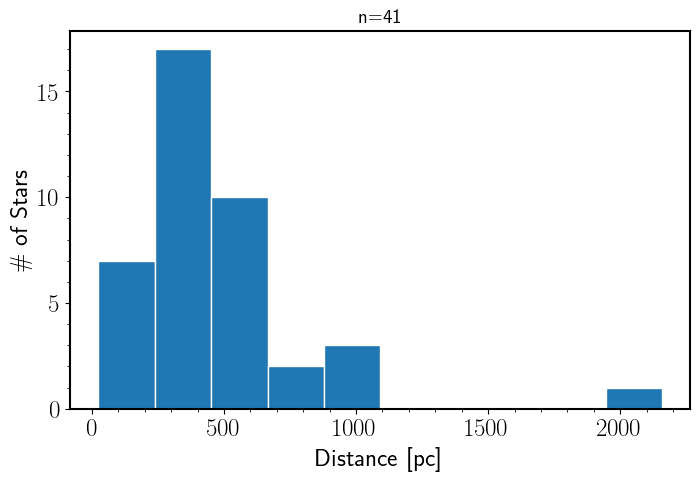

In [179]:
plt.hist(stars['st_distance'].values,edgecolor='white')
plt.xlabel('Distance [pc]')
plt.ylabel('\# of Stars')
plt.title('n=41',fontsize=14)
plt.minorticks_on()
#plt.xlim(0,100)

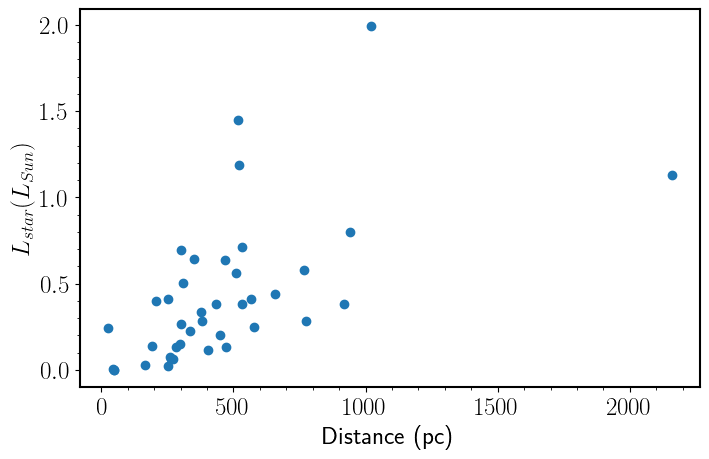

In [180]:
plt.scatter(stars['st_distance'].values,10**stars['st_log_lum'].values)
#plt.axhline(y=0.1, color='k', linestyle='-')
#plt.axhline(y=.8, color='k', linestyle='-')
#plt.axhline(y=1.5, color='k', linestyle='-')

plt.xlabel('Distance (pc)')
plt.ylabel('$L_{star} (L_{Sun})$')
plt.minorticks_on()

#plt.xlim(0,50)

LUVOIR limit might be 25pc

In [69]:
min(stars['st_distance'].values)

25.0039

(0.0, 30.0)

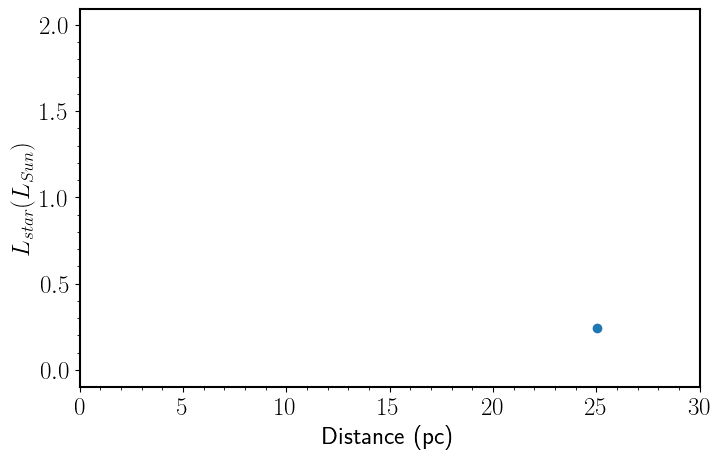

In [181]:
plt.scatter(stars['st_distance'].values,10**stars['st_log_lum'].values)
#plt.axhline(y=0.1, color='k', linestyle='-')
#plt.axhline(y=.8, color='k', linestyle='-')
#plt.axhline(y=1.5, color='k', linestyle='-')

plt.xlabel('Distance (pc)')
plt.ylabel('$L_{star} (L_{Sun})$')
plt.minorticks_on()

plt.xlim(0,30)

### Calculating Contrast

Based on Brown 2005 paper equation 3 (https://iopscience.iop.org/article/10.1086/429124/pdf)

$\Delta$mag = -2.5log$\frac{F_p}{F_s}$ =  -2.5log[p$\Phi(\beta)(\frac{R}{r})^2$]

where r = distance between planet and the star

$\beta$ = phase angle (can assume quadrature so 90 degrees)

$\Phi(\beta)$ = planetary phase function (lambertian)

R = radius of planet

p = geometric albedo of planet (.33 for Earth-like) and


$\Phi_L(\beta)$ = $\frac{\sin\beta + (\pi-\beta) cos\beta}{\pi}$

In [156]:
def lambertian (b):
    psi = ((np.sin(b)) + (np.pi-b) * np.cos(b)) /(np.pi)
    return psi

In [157]:
lambertian(90)

12.672857917793422

In [169]:
def contrast(p,l,Rp,r):
    dmag = -2.5 * np.log10(p*l*(Rp/r)**2)
    return dmag

In [163]:
candidates['semi_au'].values[0]

0.447411607

In [170]:
contrast(.33,12.67,1.2,.4)

-3.938832660501634

### Contrast for confirmed planets

In [171]:
confirmed['semi_au'].values

array([1.72227027, 1.8       , 1.533375  , 1.6       , 1.56843636,
       1.55647059])

In [172]:
dmag_conf = []

for i in range (0,len(confirmed)):
    dmag1 = contrast(.33,12.67,confirmed['rade'].values[i],confirmed['semi_au'].values[i])
    dmag_conf = np.append(dmag_conf,dmag1)
    print (dmag_conf)

[-4.07390791]
[-4.07390791 -5.79688801]
[-4.07390791 -5.79688801 -3.18652983]
[-4.07390791 -5.79688801 -3.18652983 -6.48114877]
[-4.07390791 -5.79688801 -3.18652983 -6.48114877 -3.79425073]
[-4.07390791 -5.79688801 -3.18652983 -6.48114877 -3.79425073 -5.01728104]


In [173]:
dmag_conf

array([-4.07390791, -5.79688801, -3.18652983, -6.48114877, -3.79425073,
       -5.01728104])

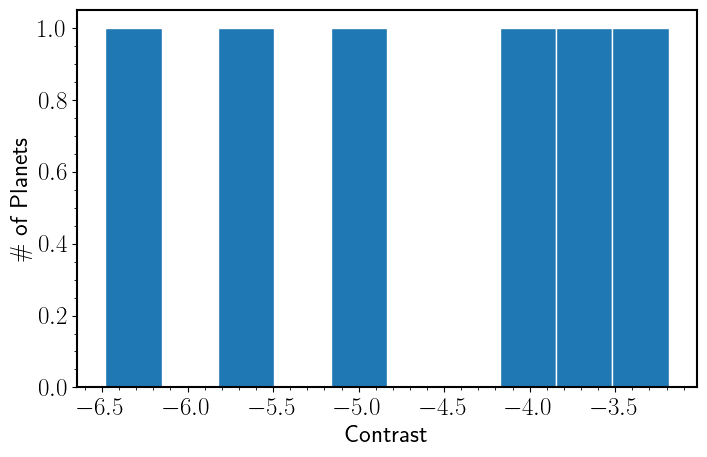

In [187]:
plt.hist(dmag_conf,edgecolor='white')
plt.xlabel('Contrast')
plt.ylabel('\# of Planets')
plt.minorticks_on()

### Contrast for candidate planets

In [174]:
dmag_cand = []

for i in range (0,len(candidates)):
    dmag2 = contrast(.33,12.67,candidates['Radius'].values[i],candidates['semi_au'].values[i])
    dmag_cand = np.append(dmag_cand,dmag2)
    #print (dmag_conf)

In [175]:
dmag_cand

array([-4.5732442 , -3.14533408, -2.12812812, -1.04709119, -2.66101207,
       -2.34466793, -3.08418991, -2.64604118, -2.6040355 , -3.41032084,
       -1.86473793, -2.10871003, -2.00643797, -2.96266888, -2.4806693 ,
       -2.09022845, -2.80633422, -2.61682112, -2.05512781, -2.28510236,
       -2.14453952, -1.72595102, -2.94533461, -3.09756078, -2.22665782,
       -2.5906947 , -2.35377154, -2.50738457, -1.43717442, -3.37442056,
       -2.45688118, -8.4722462 , -5.66483881, -7.99153443, -2.15987327])

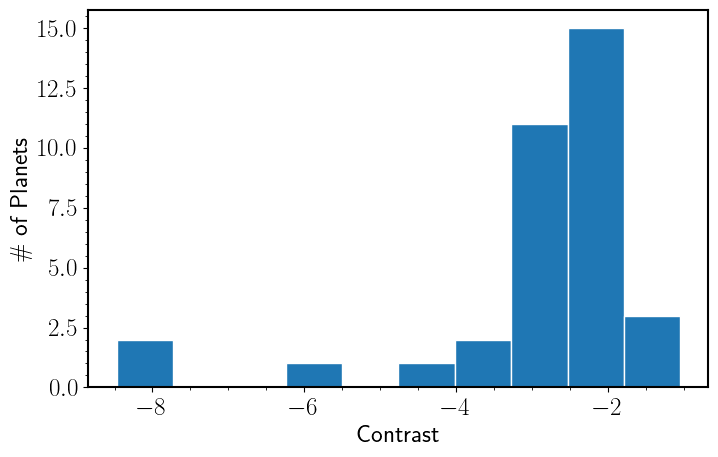

In [186]:
plt.hist(dmag_cand,edgecolor='white')
plt.xlabel('Contrast')
plt.ylabel('\# of Planets')
plt.minorticks_on()